# Homework - 3

**Name** - Tushar Ahuja


---

### Questions:

1. Identify the best-performing sector in terms of return.
2. Plot the historical returns for each sector.
3. For each ticker, calculate the following:
  * Standard deviation of the daily closing price
  * Average daily return
4. Calculate the correlation (using daily closing prices) between GOOG and AAPL.

---

## Introduction

In this we will analyze a dataset of historical financial information to evaluate sector performance, visualize trends, and understand relationships between individual stocks. Key tasks include identifying the top-performing sector by total returns, plotting historical returns for each sector, calculating statistical metrics such as volatility and average return for each ticker, and assessing the correlation between the daily closing prices of specific stocks. The goal is to provide insights that support informed investment decisions and enhance market understanding.


**Firstly**, identifying the best-performing sector requires calculating the total return for each sector. This involves summing the daily returns of all tickers within each sector to determine which sector has achieved the highest overall return. Total returns aggregate the performance of all tickers in a sector, providing a measure of which sector performed best over the observation period.

**Secondly**, plotting historical returns for each sector involves computing cumulative returns, which reflect the compounded performance over time. By plotting these cumulative returns against dates, we can visualize and compare how different sectors have evolved in performance, revealing trends and periods of volatility.

**Thirdly**, calculating the standard deviation of daily closing prices for each ticker measures the volatility or risk associated with each ticker’s price fluctuations. The standard deviation quantifies how much the closing prices deviate from their average, providing insight into the risk level of each ticker. Additionally, the average daily return is computed to assess the mean performance of each ticker, indicating whether it has generally gained or lost value over time.

**Lastly**, calculating the correlation between the daily closing prices of two tickers, such as GOOG and AAPL, measures the strength and direction of their linear relationship. The Pearson correlation coefficient quantifies whether the prices of GOOG and AAPL tend to move together or in opposite directions, offering insights into the relationship between these two assets.

---

# Step-By-Step Procedure

## 1. Loading Data From Files 

**NOTE:- This is the same step that we performed in homework 2 for loading the dataset.**

**Description**

We'll start by loading the raw data files, which include:

* **rawdata.csv:** Contains financial data in TSV (Tab Separated Values) format.
* **headers.txt:** Contains the headers for the data in rawdata.csv.

**Code**

In [128]:
import pandas as pd

# Loading the headers
with open('/Users/tusharahuja/Documents/Analytic Pg/headers.txt', 'r') as file:
    # Split on commas instead of tabs
    headers = file.read().strip().split(',')  

# printing number of headers
print(f"Number of headers: {len(headers)}")
print("Headers:", headers)

# Load data
data = pd.read_csv('/Users/tusharahuja/Documents/Analytic Pg/rawdata.csv', sep='\t', header=None)

# print number of columns in the data
print(f"Number of columns in data: {data.shape[1]}")

# Assigning headers to columns
if len(headers) == data.shape[1]:
    data.columns = headers
else:
    print("There is mismatch between number of headers and number of columns in the dataset")

# Displaying the first few rows of the dataframe
data.head()

Number of headers: 9
Headers: ['datetime', 'Date', 'time', 'ticker', 'mid', 'sector', 'industrygroup', 'alpha1', 'alpha2']
Number of columns in data: 9


,datetime,Date,time,ticker,mid,sector,industrygroup,alpha1,alpha2
0,2013-01-02 09:45:00,20130102,94500.0,A,41.655,IndustrySector_Industrial,IndustryGroup_Electronics,10.803500,0.075531
1,2013-01-02 09:45:00,20130102,94500.0,AA,8.855,IndustrySector_BasicMaterials,IndustryGroup_Mining,2.273380,0.000000
2,2013-01-02 09:45:00,20130102,94500.0,AAN,28.640,IndustrySector_ConsumerNonCyclical,IndustryGroup_CommercialServices,-6.308750,4.000000
3,2013-01-02 09:45:00,20130102,94500.0,AAP,72.990,IndustrySector_ConsumerCyclical,IndustryGroup_Retail,0.000000,0.000000
4,2013-01-02 09:45:00,20130102,94500.0,AAPL,551.595,IndustrySector_Technology,IndustryGroup_Computers,-0.864097,-0.007636


### **Explanation**

* **Loading headers:** We read the headers from headers.txt to use them in our dataframe.
* **Loading data:** We use pd.read_csv with sep=&#39;\t&#39; to correctly parse the TSV file.
* **Assigning headers:** We set the column names of the dataframe using the headers read from
the file.


## 2. Cleaning the data

### A. Checking for missing values in the ticker column

**NOTE:- This is the same step that we performed in homework 2 for cleaning the dataset.**

**Description**

* This part of the code specifically checks for missing values in the ticker column.
* The isna() function is used to identify missing values (NaN), and sum() adds up the True values, which indicate the missing entries.



In [130]:
# Check for missing values in the 'ticker' column
missing_tickers = data['ticker'].isna().sum()

# Display the number of missing tickers
print(f"Number of missing tickers: {missing_tickers}")


Number of missing tickers: 0


**Explanation:**
  
* data['ticker'].isna(): This returns a boolean series, where each element is True if the value in the ticker column is missing (i.e., NaN).
* sum(): This counts the number of True values (i.e., the total number of missing values in the ticker column).

**Output:**

The number of rows in the ticker column that have missing values is printed.

### B. Checking for missing values across all columns

**Description:**

* This part checks for missing values across all columns of the dataframe.
* The result is displayed as the number of missing values for each column.



In [132]:
# Check missing values for each column
missing_values_per_column = data.isna().sum()

# Display missing values for each column
print("Missing values per column:")
print(missing_values_per_column)


Missing values per column:
datetime         0
Date             0
time             0
ticker           0
mid              0
sector           0
industrygroup    0
alpha1           0
alpha2           0
dtype: int64


**Explanation:**

* data.isna(): This returns a dataframe of the same shape as data, where each entry is True if the corresponding value is missing (NaN) and False otherwise.
* sum(): When applied to the dataframe, it counts the number of missing values for each column. The sum is done along the vertical axis (axis=0), meaning it aggregates per column.

**Output:**

It prints how many missing values exist in each column of the dataframe. This provides an overview of missing data across all variables.

### C. Checking for rows that contain missing values in any column

In [134]:

# Check rows with any missing values
rows_with_missing = data[data.isna().any(axis=1)]

# Display the number of rows with missing values
print(f"Number of rows with missing values: {len(rows_with_missing)}")

# Optionally, display the first few rows with missing data
rows_with_missing.head()


Number of rows with missing values: 0


,datetime,Date,time,ticker,mid,sector,industrygroup,alpha1,alpha2


**Explanation:**

* data.isna(): This returns a boolean dataframe where each value is True if it is missing and False if it is present.
* any(axis=1): This checks across rows (with axis=1), returning True if any value in that row is missing.
* data[data.isna().any(axis=1)]: This filters the dataframe, selecting only the rows where at least one value is missing.

**Output:**

* Number of rows with missing values: Prints how many rows have at least one missing value.
* Displaying rows with missing values: Optionally, displays the first few rows that contain missing data for inspection.

## Summary of data cleaning:

* First part checks for missing values in the ticker column specifically.
* Second part provides an overview of missing data across all columns.
* Third part focuses on rows that have missing values in any of their columns, allowing us to understand how many rows need to be handled.

---

### Checking the shape of the data before and after cleaning is essential. Above are the basic steps that we can perform to clean our data. The steps listed below are the only ones that can be taken to prepare the dataset.

In [136]:
# # Get the dimensions of the DataFrame.
data.shape

(35551185, 9)

In [138]:
# Remove rows with missing data
cleaned_data = data.dropna()

# Display the shape of the cleaned dataframe
cleaned_data.shape

(35551185, 9)

---

## 3. Analyze Data

**NOTE:- This is the same step that we performed in homework 2 for analyzing dataset, calculated the return for each sector and best-performing sector**

(Answer to question - 1)

In [140]:
# Ensuring 'datetime' is in the correct datetime format given
cleaned_data['datetime'] = pd.to_datetime(cleaned_data['datetime'])

# Sorting the data by datetime 
cleaned_data = cleaned_data.sort_values(by='datetime')

# Calculating returns as the percentage change in 'mid' for each sector varies
cleaned_data['return'] = cleaned_data.groupby('sector')['mid'].pct_change()

# Removing rows with NaN returns (since the first row in each sector group will have NaN return due to pct_change())
cleaned_data = cleaned_data.dropna(subset=['return'])

# Displaying the first few rows with returns calculated
cleaned_data.head()


,datetime,Date,time,ticker,mid,sector,industrygroup,alpha1,alpha2,return
1005,2013-01-02 09:45:00,20130102,94500.0,OSIS,65.425,IndustrySector_Industrial,IndustryGroup_Electronics,0.00000,4.000000,0.570640
1004,2013-01-02 09:45:00,20130102,94500.0,ORLY,90.260,IndustrySector_ConsumerCyclical,IndustryGroup_Retail,0.00000,-0.770164,1.908798
999,2013-01-02 09:45:00,20130102,94500.0,ONNN,7.265,IndustrySector_Technology,IndustryGroup_Semiconductors,-1.46021,0.000000,-0.788408
998,2013-01-02 09:45:00,20130102,94500.0,OMX,10.005,IndustrySector_ConsumerCyclical,IndustryGroup_Retail,-5.64462,0.000000,-0.889154
997,2013-01-02 09:45:00,20130102,94500.0,OMI,28.715,IndustrySector_ConsumerCyclical,IndustryGroup_DistributionWholesale,3.66698,-4.000000,1.870065


**Description**

* We will calculate the return for each sector and identify the best-performing sector.
* Grouping data: We group the data by Sector and mid and calculate the returns as the percentage change in 'mid' for each sector.
* Identifying the best performer: We find the sector with the highest average return.

**Explanation**


**1. Convert 'datetime' to DateTime Format:**

* Ensuring that the datetime column is in proper datetime format.
* Enables easy manipulation of date and time-based operations.

**2. Sort Data by 'datetime':**

* We can order the dataset chronologically by the datetime column.
* It is important for time-based calculations, such as percentage change over time.

**3. Calculate Returns for Each Sector:**

* Using groupby('sector') to group data by sector.
* Computing percentage change in mid values for each sector using pct_change(), representing the sector's return.

**4. Remove NaN Rows from Returns:**

* Removing rows where NaN values appear in the return column.
* This happens because the first row in each group will not have a previous value to calculate percentage change.

**5. Display Cleaned Data:**

* Displaying the first few rows of the cleaned data with calculated returns.
* Ensures the data is ready for analysis.

---

In [142]:
# Calculate total return for each sector
sector_performance = cleaned_data.groupby('sector')['return'].sum().reset_index()

# Finding the best-performing sector (highest total return)
best_performing_sector = sector_performance.loc[sector_performance['return'].idxmax()]

print("Best-performing sector:")
print(best_performing_sector)


Best-performing sector:
sector    IndustrySector_ConsumerNonCyclical
return                96845022963064127488.0
Name: 3, dtype: object


**Description:**

* Group by Sector and Calculate Total Return: It sums the returns for each sector to find the total return.
* Identify the Best-Performing Sector: We have to find the sector with the highest total return.
* Display the Best-Performing Sector: We have to showcase the sector with the highest total return.



**Explanation**

**1. Group by Sector and Calculate Total Return:**

* Objective: To compute the total return for each sector by summing up the individual returns within that sector.
* Process:
  a. Grouping: Data is organized by sector.
  b. Aggregation: Total return is calculated for each sector by summing the returns.

**2. Identify the Best-Performing Sector:**

* Objective: To determine which sector has the highest total return.
* Process:
   a. Maximum Identification: The sector with the highest total return is identified by finding the maximum value among the sector returns.

**3. Display the Best-Performing Sector:**

* Objective: To present the sector with the highest total return, providing insight into which sector performed the best.

### **Best-performing sector based on mean return**

In [144]:
# Group by sector and calculate the mean return for each sector
sector_mean_performance = cleaned_data.groupby('sector')['return'].mean().reset_index()

# Find the best-performing sector (highest mean return)
best_performing_sector_mean = sector_mean_performance.loc[sector_mean_performance['return'].idxmax()]

print("Best-performing sector based on mean return:")
print(best_performing_sector_mean)


Best-performing sector based on mean return:
sector    IndustrySector_ConsumerNonCyclical
return                 15391883501224.599609
Name: 3, dtype: object


## 4. Plot the historical best return sector 

**NOTE:- This is the same step that we performed in homework 2 for plotting historical best return sector and cumulative historical return.**

(Answer to question - 2)

Now we will filter the dataset to include only the best-performing sector and creates a time-series plot of its historical returns. It labels the axes and title for clarity, adds a legend for identification, and includes gridlines to enhance readability. The plot is then displayed to visualize how returns have varied over time for the selected sector.

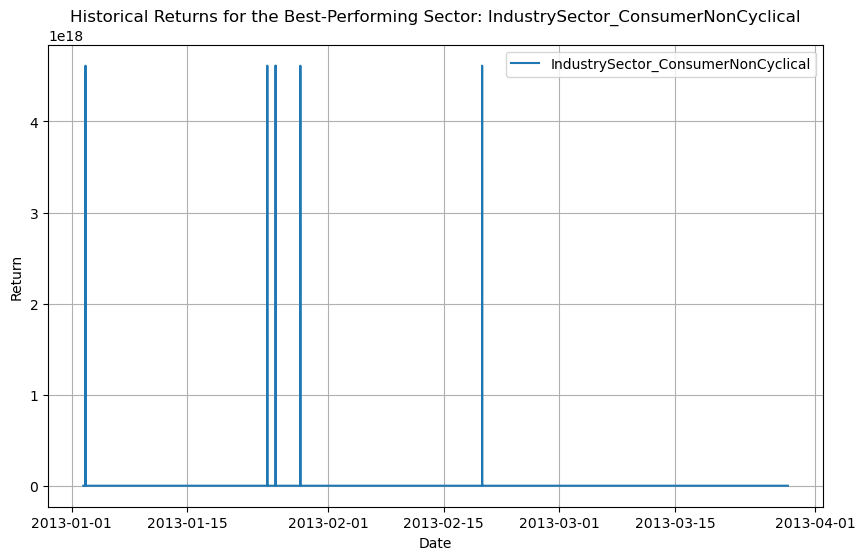

In [146]:
import matplotlib.pyplot as plt

# Filter data for the best-performing sector
best_sector_data = cleaned_data[cleaned_data['sector'] == best_performing_sector['sector']]

# Plot historical returns for the best-performing sector
plt.figure(figsize=(10, 6))
plt.plot(best_sector_data['datetime'], best_sector_data['return'], label=best_performing_sector['sector'])
plt.xlabel('Date')
plt.ylabel('Return')
plt.title(f'Historical Returns for the Best-Performing Sector: {best_performing_sector["sector"]}')
plt.legend()
plt.grid(True)
plt.show()


### Theoretical Analysis

**1. Filtering Data for the Best-Performing Sector:**

* Extracts the subset of data corresponding to the best-performing sector.

**2. Create a Plot Figure:**

* Initializing a new plot with specified dimensions for clarity and readability.

**3. Plot Historical Returns:**

* Plots the returns of the best-performing sector over time, showing how returns change with dates.

**4. Label X-Axis:**

* Adds a label to the x-axis indicating that it represents dates.

**5. Label Y-Axis:**

* Adds a label to the y-axis indicating that it represents returns.

**6. Set Plot Title:**

* Provides a title for the plot that includes the name of the best-performing sector.

**7. Add Legend:**

* Displays a legend to identify the line representing the best-performing sector.

**8. Enable Grid:**

* Adds gridlines to the plot to aid in reading and interpreting the data.

**9. Display the Plot:**

* Renders and shows the plot to the us.

### To visualize the historical returns for multiple sectors on a single plot, allowing for comparative analysis of sector performance over time.

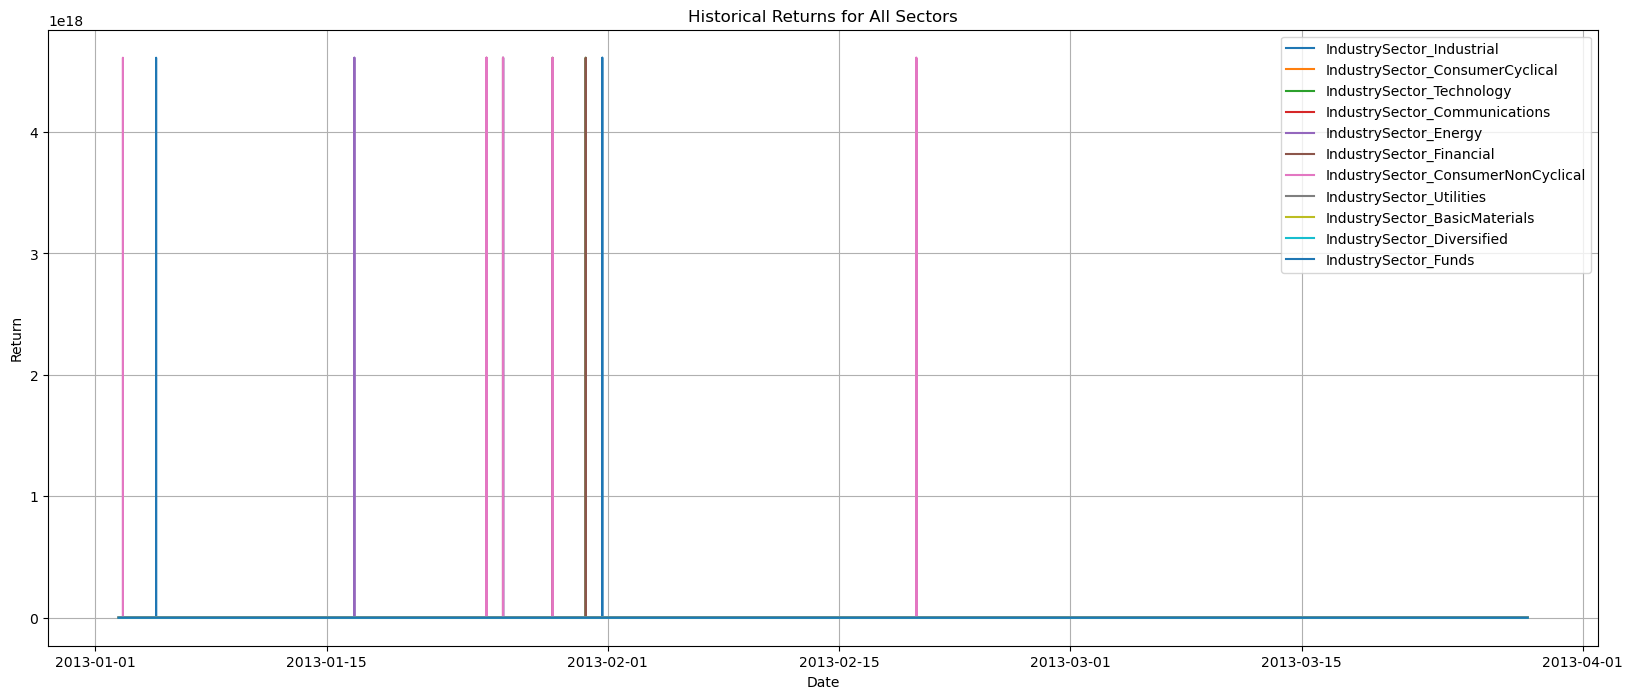

In [148]:
import matplotlib.pyplot as plt

# Create a plot figure
plt.figure(figsize=(20, 8))

# Loop through each sector and plot its historical returns
for sector in cleaned_data['sector'].unique():
    sector_data = cleaned_data[cleaned_data['sector'] == sector]
    plt.plot(sector_data['datetime'], sector_data['return'], label=sector)

# Label the axes
plt.xlabel('Date')
plt.ylabel('Return')

# Set the title of the plot
plt.title('Historical Returns for All Sectors')

# Adding a legend to differentiate between sectors
plt.legend()

# Enable grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()


### Theoretical Analysis

**1. Initializing the Plot:**

* A new figure for plotting is created with dimensions of 20 inches by 8 inches. This size is chosen to ensure that all data is clearly visible and readable.

**2. Plot Historical Returns:**

* The code iterates through each unique sector in the dataset. For each sector, it filters the data to extract the historical returns over time and plots these returns as a line on the graph. Each sector is represented by a distinct line, enabling direct comparison of performance across different sectors.

**3. Label the Axes:**

* The x-axis is labeled 'Date' to indicate that it represents time, while the y-axis is labeled 'Return' to denote that it shows the return values. These labels provide clarity on what each axis represents.

**4. Set the Plot Title:**

* The plot is titled 'Historical Returns for All Sectors.' This title succinctly describes the content of the plot, summarizing that it displays the historical returns for all sectors.

**5. Add a Legend:**

* A legend is included to differentiate between the lines representing each sector. This allows viewers to easily identify which line corresponds to which sector, enhancing interpretability.

**6. Enable Grid:**

* Gridlines are added to the plot to improve readability. They help viewers align and compare data points more effectively.

**7. Display the Plot:**

* The final plot is rendered and displayed. This visual representation allows users to analyze and compare the historical performance of different sectors over time.

### Historical Cumulative Plot

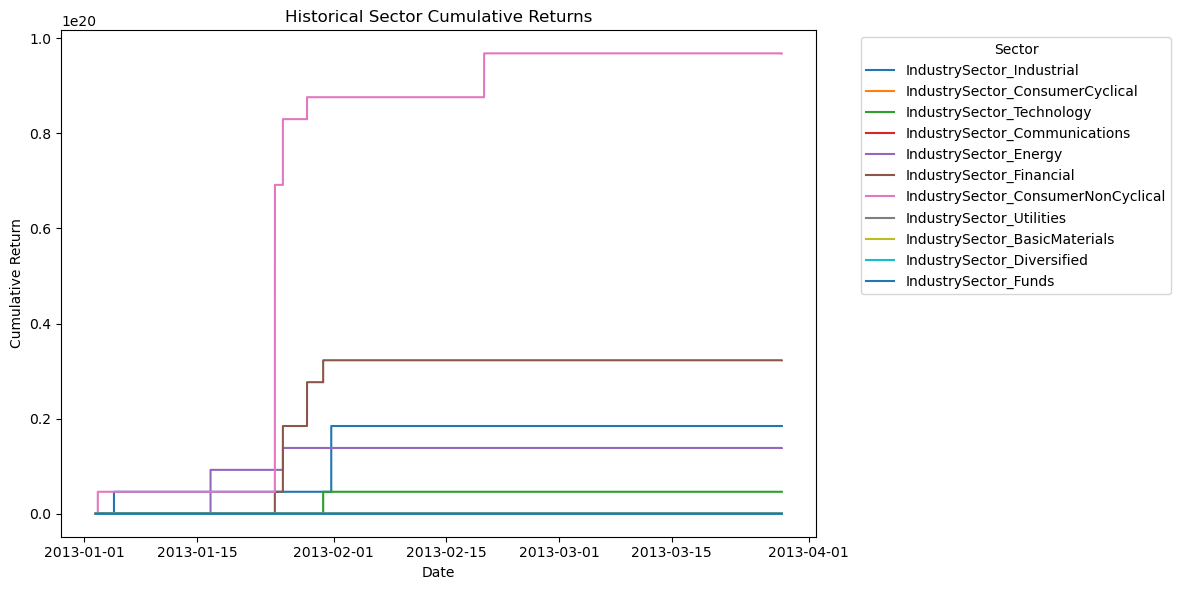

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensuring 'datetime' is in datetime format and setting it as index
cleaned_data['datetime'] = pd.to_datetime(cleaned_data['datetime'])
cleaned_data.set_index('datetime', inplace=True)

# Calculating cumulative returns for each sector
cleaned_data['cumulative_return'] = cleaned_data.groupby('sector')['return'].cumsum()

# Creating a new figure for the plot
plt.figure(figsize=(12, 6))

# Loop through each sector and plot its cumulative returns
for sector in cleaned_data['sector'].unique():
    sector_data = cleaned_data[cleaned_data['sector'] == sector]
    plt.plot(sector_data.index, sector_data['cumulative_return'], label=sector)

plt.title('Historical Sector Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Adjusting legend and layout
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

This script calculates and visualizes the cumulative returns of various sectors over time. It first ensures the datetime column is properly formatted and set as the index, then computes the cumulative returns by sector, and finally plots these cumulative returns with distinct lines for each sector. The plot is customized with labels, a legend, and adjusted layout for clarity.

---

## 5. Calculating the standard deviation of the Daily Closing Price and Average Daily Return
(Answer to question - 3)

### Introduction
Here we are analyzing stock data to understand two key financial metrics for various tickers (stocks) over a given period:

* **Standard Deviation of Daily Closing Prices:** This metric indicates the volatility of the stock price. A higher standard deviation means greater variability in the daily closing prices, reflecting higher risk.

* **Average Daily Return:** This represents the average daily percentage change in the stock price, providing insight into the stock’s average performance on a daily basis.


### Step-By-Step Procedure

To achieve the goal of getting the closing price, starting price, and then calculating the standard deviation of the daily closing price and the average daily return, we'll break the process down into the following steps:

* Preprocess Data: Clean up and preparing our data.
* Calculating Start Prices: Identifying the starting price for each ticker on a specific date.
* Calculating End Prices: Identifying the closing price for each ticker on a specific date.
* Calculating Returns: Computing the returns based on the start and end prices.
* Calculating Standard Deviation and Average Daily Return: Performing the necessary calculations that are asked.

## Step 1: Preprocessing Data

In [152]:
import pandas as pd

# Removing 'IndustrySector_' prefix from the 'sector' column
cleaned_data['sector'] = cleaned_data['sector'].apply(lambda x: x.removeprefix('IndustrySector_'))

# Ensuring 'Date' column is of integer type if it isn't already
cleaned_data['Date'] = cleaned_data['Date'].astype(int)


In [168]:
cleaned_data.head()

,Date,time,ticker,mid,sector,industrygroup,alpha1,alpha2,return,cumulative_return
datetime,,,,,,,,,,
2013-01-02 09:45:00,20130102,94500.0,OSIS,65.425,Industrial,IndustryGroup_Electronics,0.00000,4.000000,0.570640,0.570640
2013-01-02 09:45:00,20130102,94500.0,ORLY,90.260,ConsumerCyclical,IndustryGroup_Retail,0.00000,-0.770164,1.908798,1.908798
2013-01-02 09:45:00,20130102,94500.0,ONNN,7.265,Technology,IndustryGroup_Semiconductors,-1.46021,0.000000,-0.788408,-0.788408
2013-01-02 09:45:00,20130102,94500.0,OMX,10.005,ConsumerCyclical,IndustryGroup_Retail,-5.64462,0.000000,-0.889154,1.019644
2013-01-02 09:45:00,20130102,94500.0,OMI,28.715,ConsumerCyclical,IndustryGroup_DistributionWholesale,3.66698,-4.000000,1.870065,2.889709


In [170]:
cleaned_data.columns

Index(['Date', 'time', 'ticker', 'mid', 'sector', 'industrygroup', 'alpha1',
       'alpha2', 'return', 'cumulative_return'],
      dtype='object')

### Comments

**1. Importing Pandas:**
To use the pandas library for handling and analyzing data in Python.

**2. Removing Prefix from 'sector' Column:**
Cleaning the 'sector' column by removing the 'IndustrySector_' prefix to standardize the data.

**3. Ensuring 'Date' Column is Integer Type:**
Converting the 'Date' column to integers to facilitate numerical operations and ensure correct data formatting.

## Step 2: Calculating Start Prices

In [176]:
# Extracting the start price
start_date = 20130102
start_time = 94500.0
start_price = cleaned_data[(cleaned_data['Date'] == start_date) & (cleaned_data['time'] == start_time)]

# Dropping unnecessary columns
start_price = start_price.drop(columns=['Date','time', 'alpha1', 'alpha2','industrygroup'])

# Grouping by 'ticker' and taking the last entry in each group
start_price = start_price.groupby('ticker')[['mid', 'sector']].last()

# Renaming 'mid' to 'start_price'
start_price = start_price.rename(columns={'mid': 'start_price'})


In [180]:
start_price

,start_price,sector
ticker,,
AA,8.855,BasicMaterials
AAN,28.640,ConsumerNonCyclical
AAP,72.990,ConsumerCyclical
AAPL,551.595,Technology
ABB,21.245,Industrial
...,...,...
Z,28.690,Communications
ZION,21.865,Financial
ZMH,67.565,ConsumerNonCyclical


### Comments

**1. Extract Start Price:**
 Selecting rows from cleaned_data where the date is 20130102 and the time is 94500.0 to get the starting prices for the specified date and time.

**2. Drop Unnecessary Columns:**
Removing columns that are not needed for the analysis, simplifying the DataFrame to include only relevant data.

**3. Group by Ticker:**
Grouping the data by the 'ticker' column and select the last entry for each ticker. This ensures we have one entry per ticker with the relevant data.

**4. Rename Column:**
Changing the name of the 'mid' column to 'start_price' to clearly indicate that this column represents the starting price for each ticker.

## Step 3: Calculating End Prices

In [182]:
# Extracting the end price
end_date = 20130328
end_time = 160000
close_price = cleaned_data[(cleaned_data['Date'] == end_date) & (cleaned_data['time'] == end_time)]

# Renaming 'mid' to 'end_price'
close_price = close_price.rename(columns={'mid': 'end_price'})

# Grouping by 'ticker' and taking the last entry in each group
close_price = close_price.groupby('ticker')['end_price'].last()

# Merging start_price and close_price
price_data = start_price.join(close_price)


In [184]:
price_data

,start_price,sector,end_price
ticker,,,
AA,8.855,BasicMaterials,8.525
AAN,28.640,ConsumerNonCyclical,NaN
AAP,72.990,ConsumerCyclical,82.630
AAPL,551.595,Technology,442.490
ABB,21.245,Industrial,22.755
...,...,...,...
Z,28.690,Communications,54.645
ZION,21.865,Financial,24.985
ZMH,67.565,ConsumerNonCyclical,75.195


### Comments

**1. Extracting End Price:**
Filter rows from cleaned_data where the date is 20130328 and the time is 160000 to get the closing prices for the specified date and time.

**2. Rename Column:**
Renaming the 'mid' column to 'end_price' to indicate that these values represent the closing prices.

**3. Group by Ticker:**
Grouping the data by the 'ticker' column and select the last entry for each ticker, ensuring one closing price per ticker.

**4. Merge Start and End Prices:**
Combining the DataFrames start_price and close_price into a single DataFrame, price_data, aligning start and end prices for each ticker.

## Step 4: Calculating Returns

In [186]:
# Calculating return based on start and end prices
price_data['return'] = (price_data['end_price'] / price_data['start_price']) - 1


In [205]:
price_data

,start_price,sector,end_price,return
ticker,,,,
AA,8.855,BasicMaterials,8.525,-0.037267
AAP,72.990,ConsumerCyclical,82.630,0.132073
AAPL,551.595,Technology,442.490,-0.197799
ABB,21.245,Industrial,22.755,0.071076
ABBV,35.120,ConsumerNonCyclical,40.740,0.160023
...,...,...,...,...
YUM,67.110,ConsumerCyclical,71.905,0.071450
Z,28.690,Communications,54.645,0.904671
ZION,21.865,Financial,24.985,0.142694


### Comments

**1. Calculate Return:**
Computing the return for each ticker based on the start and end prices.

**Formula:** (end_price / start_price) - 1
This formula calculates the percentage change between the start and end prices, representing the return on investment.

## Step 5: Calculating Standard Deviation and Average Daily Return

In [188]:
# Get daily closing prices for standard deviation calculation
daily_closing_prices = cleaned_data[['Date', 'time', 'ticker', 'mid']]

# Pivot the data to have tickers as columns with their daily closing prices
daily_closing_prices_pivot = daily_closing_prices.pivot_table(index=['Date', 'time'], columns='ticker', values='mid')

# Calculating standard deviation of daily closing prices for each ticker
std_dev_closing_price = daily_closing_prices_pivot.std()

print("Standard Deviation of Daily Closing Prices:")
print(std_dev_closing_price)


Standard Deviation of Daily Closing Prices:
ticker
A        1.262698e+00
AA       2.653690e-01
AAMRQ    3.214505e-21
AAN      2.374681e+09
AAP      2.892821e+00
             ...     
ZMH      2.077471e+00
ZNGA     4.600388e-01
ZQK      2.345732e-01
ZTS      9.085834e-01
ZUMZ     6.518026e-01
Length: 1708, dtype: float64


### Comments

**1. Extracting Daily Closing Prices:**
Selecting relevant columns ('Date', 'time', 'ticker', 'mid') from cleaned_data to focus on daily closing prices for each ticker.

**2. Pivot Data:**
Transforming the DataFrame so that each ticker becomes a column with its corresponding daily closing prices as values. This organizes the data with dates and times as indices.

**3. Calculate Standard Deviation:**
Computing the standard deviation of the daily closing prices for each ticker. This measures the variability or volatility of closing prices over the period.

## Step 6: Calculating the average daily return:

In [190]:
# Dropping rows with NaN values before calculating average daily return
price_data = price_data.dropna()

# Grouping by 'sector' and calculating mean return
sector_return = price_data.groupby('sector')['return'].mean()

print("Average Daily Return by Sector:")
print(sector_return)


Average Daily Return by Sector:
sector
BasicMaterials        -0.080521
Communications         0.077274
ConsumerCyclical       0.103013
ConsumerNonCyclical    0.123574
Energy                 0.102422
Financial              0.103837
Industrial             0.097455
Technology             0.087194
Utilities              0.101089
Name: return, dtype: float64


### Comments

**1. Drop Rows with NaN Values:**
Removing rows from price_data that contain missing values to ensure accurate calculations for the average daily return.

**2. Group by Sector and Calculate Mean Return:**
Groupping the cleaned data by the 'sector' column and calculating the average daily return for each sector.

**3. Grouping:**
Organizing the data into groups based on the 'sector'.

**5. Calculating Mean:**
Computing the mean of the 'return' column within each sector group to determine the average daily return for that sector.

## 6. Calculating the correlation (using daily closing prices) between GOOG and AAPL.
(Answer to question - 4)

In this analysis, we will determine the relationship between the daily closing prices of two major technology stocks: Google (GOOG) and Apple (AAPL). Specifically, we want to calculate the correlation coefficient, which measures the strength and direction of the linear relationship between the closing prices of these two stocks over time. This information can be useful for investors looking to understand how the movements of these two stocks are related, which can inform decisions about portfolio diversification and risk management.

In [211]:
 import pandas as pd

# Ensuring 'Date' is in datetime format for accurate operations
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], format='%Y%m%d')

# Filter the data for GOOG and AAPL
filtered_data = cleaned_data[cleaned_data['ticker'].isin(['GOOG', 'AAPL'])]

# Pivoting the data to have closing prices for each ticker in separate columns
pivoted_data = filtered_data.pivot_table(index='Date', columns='ticker', values='mid')

# Dropping rows with any NaN values (which occur if a date is missing for one of the tickers)
pivoted_data = pivoted_data.dropna()

# Calculating the correlation between GOOG and AAPL
correlation = pivoted_data['GOOG'].corr(pivoted_data['AAPL'])

print("Correlation between GOOG and AAPL:")
print(correlation)


Correlation between GOOG and AAPL:
-0.8222325451518117


### Explanation

**1. Converting 'Date' to Datetime Format:**

Ensuring that the 'Date' column is in datetime format for proper date-based operations and comparisons and using pd.to_datetime() to convert 'Date' from a string format (e.g., YYYYMMDD) to a datetime object.

**2. Filter Data for Specific Tickers:**

Focusing on the data for only GOOG and AAPL. Using the .isin() method to select rows where the 'ticker' is either GOOG or AAPL.

**3. Pivot Data:**

Reshaping the data so that each ticker’s closing prices appear in separate columns. Using the pivot_table() to create a table where dates are the index and each ticker's closing price is in its own column.

**4. Drop Rows with Missing Values:**

Removing any dates where closing prices for either ticker are missing, ensuring complete data for correlation calculation. Using dropna() to eliminate rows with NaN values.

**5. Calculate Correlation:**

Measuring the relationship between the closing prices of GOOG and AAPL. Using the .corr() method to compute the Pearson correlation coefficient between the closing prices of the two tickers.

**6. Print Correlation:**

Displaying the calculated correlation coefficient, which quantifies how closely the closing prices of GOOG and AAPL move together.